#**Paper**

Link al paper: https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

#**Dataset Vacas y caballos**

##Transformación del xml a csv

In [35]:
#Se monta el drive
from google.colab import drive

drive.mount('/content/drive')
width = 128
height = 128
num_classes = 2
esquinas_bb = 4
classes = ["vaca", "caballo"]

#crear el dataset

import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET



def xml_to_csv(path):
    xml_list = []
    print(f"Processing XML files in: {path}")
    for xml_file in glob.glob(path + '/*.xml'):
        print(f"Reading file: {xml_file}")
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = round(float(bbx.find('xmin').text))
            ymin = round(float(bbx.find('ymin').text))
            xmax = round(float(bbx.find('xmax').text))
            ymax = round(float(bbx.find('ymax').text))
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            print(f"Extracted data: {value}")
            xml_list.append(value)

    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    print(f"Dataframe created with {len(xml_df)} entries.")
    return xml_df

def main():
    datasets = ['train', 'test']

    for ds in datasets:
        image_path = f'/content/drive/MyDrive/TPO_IA/datasetpascal/images/{ds}/'  # Adjusted path to include the dataset
        print(f"Converting XML to CSV for dataset: {ds}")
        xml_df = xml_to_csv(image_path)
        output_path = f'sample_data/{ds}_data.csv'  # Fixed the output file naming
        xml_df.to_csv(output_path, index=None)
        print(f'Successfully converted xml to csv and saved to: {output_path}')

if __name__ == '__main__':
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Converting XML to CSV for dataset: train
Processing XML files in: /content/drive/MyDrive/TPO_IA/datasetpascal/images/train/
Reading file: /content/drive/MyDrive/TPO_IA/datasetpascal/images/train/88679efb-3af4adac-vaca9.xml
Extracted data: ('88679efb-3af4adac-vaca9.png', 128, 128, 'vaca', 0, 27, 16, 84)
Extracted data: ('88679efb-3af4adac-vaca9.png', 128, 128, 'vaca', 24, 30, 62, 83)
Extracted data: ('88679efb-3af4adac-vaca9.png', 128, 128, 'vaca', 63, 35, 95, 95)
Reading file: /content/drive/MyDrive/TPO_IA/datasetpascal/images/train/c39c51af-ad03ef89-caballo10.xml
Extracted data: ('c39c51af-ad03ef89-caballo10.png', 128, 128, 'caballo', 15, 11, 118, 119)
Reading file: /content/drive/MyDrive/TPO_IA/datasetpascal/images/train/24e384fd-b3a11a91-vaca3.xml
Extracted data: ('24e384fd-b3a11a91-vaca3.png', 128, 128, 'vaca', 10, 16, 103, 113)
Extracted data: ('24e384fd

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

TRAINING_CSV_FILE = 'sample_data/train_data.csv'
TRAINING_IMAGE_DIR = 'Images/train'

training_image_records = pd.read_csv(TRAINING_CSV_FILE)

classes = training_image_records['class'].unique().tolist() # Getting unique

train_images = []
train_targets = []
train_labels = []

for index, row in training_image_records.iterrows():

    (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

    train_image_fullpath = '/content/drive/MyDrive/TPO_IA/datasetpascal/images/train/'+filename
    train_img = keras.preprocessing.image.load_img(train_image_fullpath, target_size=(height, width))
    train_img_arr = keras.preprocessing.image.img_to_array(train_img)


    xmin = round(xmin/ width, 2)
    ymin = round(ymin/ height, 2)
    xmax = round(xmax/ width, 2)
    ymax = round(ymax/ height, 2)

    train_images.append(train_img_arr)
    train_targets.append((xmin, ymin, xmax, ymax))
    train_labels.append(classes.index(class_name))

In [48]:
import torchvision.transforms as transforms

def Dataset(batch_size):

  testING_CSV_FILE = 'sample_data/test_data.csv'
  testING_IMAGE_DIR = 'Images/test'

  testing_image_records = pd.read_csv(testING_CSV_FILE)


  test_images = []
  test_targets = []
  test_labels = []

  for index, row in testing_image_records.iterrows():

      (filename, width, height, class_name, xmin, ymin, xmax, ymax) = row

      test_image_fullpath = '/content/drive/MyDrive/TPO_IA/datasetpascal/images/test/'+filename


      test_img = keras.preprocessing.image.load_img(test_image_fullpath, target_size=(height, width))
      test_img_arr = keras.preprocessing.image.img_to_array(test_img)


      xmin = round(xmin/ width, 2)
      ymin = round(ymin/ height, 2)
      xmax = round(xmax/ width, 2)
      ymax = round(ymax/ height, 2)

      test_images.append(test_img_arr)
      test_targets.append((xmin, ymin, xmax, ymax))
      test_labels.append(classes.index(class_name))

      train_images = np.array(train_images)
      train_targets = np.array(train_targets)
      train_labels = np.array(train_labels)

      train_images = torch.from_numpy(train_images).float()
      train_targets = torch.from_numpy(train_targets).float()
      train_labels = torch.from_numpy(train_labels).long() # Labels should be long integers

      test_images = np.array(test_images)
      test_targets = np.array(test_targets)
      test_labels = np.array(test_labels)

      test_images = torch.from_numpy(test_images).float()
      test_targets = torch.from_numpy(test_targets).float()
      test_labels = torch.from_numpy(test_labels).long() # Labels should be long integers

      train_images = train_images / 255.0
      test_images = test_images / 255.0


  return train_images, train_targets, train_labels, test_images, test_targets, test_labels

In [49]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, images, targets, labels, transform=None):
        self.images = images
        self.targets = targets
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        target = self.targets[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, target, label

# Create dataset and dataloader
train_dataset = CustomDataset(train_images, train_targets, train_labels)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

test_dataset = CustomDataset(test_images, test_targets, test_labels)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

#**Implementación AlexNet**

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim

class AlexNet(nn.Module):
    def __init__(self, in_channels=3, classes=1000):
        super().__init__()
        self.c1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.c2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.c3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.c4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.c5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)

        # Define activation and other layers here
        self.localnorm = nn.LocalResponseNorm(size=5)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(self._get_fc1_input_size(in_channels), 4096)    #Según el paper es nn.Linear(6*6*256, 4096), pero yo tengo que usar calcular el input porque mis imagenes son de 128x128
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, classes)

        self.init_weight()

    def forward(self, x):
        # x shape: [batch, 3, 227, 227]
        x = self.relu(self.c1(x))
        # x shape: [batch, 96, 55, 55]
        x = self.maxpool(self.localnorm(x))
        # x shape: [batch, 96, 27, 27]
        x = self.relu(self.c2(x))
        # x shape: [batch, 256, 27, 27]
        x = self.maxpool(self.localnorm(x))
        # x shape: [batch, 256, 13, 13]
        x = self.relu(self.c3(x))
        # x shape: [batch, 384, 13, 13]
        x = self.relu(self.c4(x))
        # x shape: [batch, 384, 13, 13]
        x = self.maxpool(self.relu(self.c5(x)))
        # x shape: [batch, 256, 6, 6]
        x = torch.flatten(x,1)
        # x shape: [batch, 256*6*6]
        x = self.relu(self.dropout(self.fc1(x)))
        # x shape: [batch, 4096]
        x = self.relu(self.dropout(self.fc2(x)))
        # x shape: [batch, 4096]
        x = self.fc3(x)
        # x shape: [batch, classes]
        return x

    def init_weight(self):
      #print(next(self.modules()))
        bias = [1,3,4,5,6,7]
        for i,layer in enumerate(self.modules()):
            if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.Linear):
                if i in bias:
                    nn.init.constant_(layer.bias, 1)
                else:
                    nn.init.constant_(layer.bias, 0)

                nn.init.normal_(layer.weight, mean=0, std=0.01)

    def _get_fc1_input_size(self, in_channels):
        """
        Calculates the input size for the first fully connected layer (fc1).

        This method takes the input channels and performs a series of
        convolutions and pooling operations to determine the output size
        of the convolutional layers, which will be the input size for fc1.

        Args:
            in_channels: The number of input channels.

        Returns:
            The calculated input size for fc1.
        """
        # Create a dummy input tensor
        dummy_input = torch.randn(1, in_channels, 128, 128) # Assuming input size is 128x128

        # Pass the dummy input through the convolutional layers
        x = self.relu(self.c1(dummy_input))
        x = self.maxpool(self.localnorm(x))
        x = self.relu(self.c2(x))
        x = self.maxpool(self.localnorm(x))
        x = self.relu(self.c3(x))
        x = self.relu(self.c4(x))
        x = self.maxpool(self.relu(self.c5(x)))

        # Get the flattened size of the output
        return x.view(1, -1).size(1)

In [63]:
def calculate_accuracy(outputs, labels):
  _, predicted = torch.max(outputs, 1)  # Get the predicted class index
  total = labels.size(0)  # Total number of samples
  correct = (predicted == labels).sum().item()  # Number of correct predictions
  accuracy = correct / total
  return accuracy

In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


if __name__ == "__main__":
    model = AlexNet(classes=len(classes)) # in this case 2
    model.to(device)


    optimizer = optim.Adam(model.parameters(), lr=0.001) # Choose an optimizer and learning rate
    criterion = nn.CrossEntropyLoss() # Choose an appropriate loss function

    #Training loop
    num_epochs = 10 # Adjust the number of epochs
    train_accuracies = []  # Store training accuracies for plotting

    for epoch in range(num_epochs):
      epoch_accuracy = 0  # Initialize epoch accuracy
      total_correct = 0
      total_samples = 0

      for batch_idx, (data, targets, labels) in enumerate(train_loader):
          # Move data to the device (GPU if available)
          data = data.to(device)
          labels = labels.to(device)

          # Permute the dimensions of the input data
          data = data.permute(0, 3, 1, 2) # Change from [batch, height, width, channels] to [batch, channels, height, width]


          # Zero the gradients
          optimizer.zero_grad()

          # Forward pass
          outputs = model(data)

          # Calculate loss
          loss = criterion(outputs, labels)

          # Backward pass
          loss.backward()

          # Update weights
          optimizer.step()

          # Calculate and accumulate correct predictions and total samples
          _, predicted = torch.max(outputs, 1)
          total_correct += (predicted == labels).sum().item()
          total_samples += labels.size(0)

      # Calculate epoch accuracy after processing all batches in the epoch
      epoch_accuracy = total_correct / total_samples
      train_accuracies.append(epoch_accuracy)

      print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {epoch_accuracy:.4f}, Batch loss: {loss.item():.4f}")

Epoch [1/10], Accuracy: 0.4773, Batch loss: 0.7614
Epoch [2/10], Accuracy: 0.6818, Batch loss: 0.5808
Epoch [3/10], Accuracy: 0.6818, Batch loss: 1.3859
Epoch [4/10], Accuracy: 0.6818, Batch loss: 0.6924
Epoch [5/10], Accuracy: 0.6818, Batch loss: 0.7152
Epoch [6/10], Accuracy: 0.6818, Batch loss: 0.4441
Epoch [7/10], Accuracy: 0.6818, Batch loss: 0.3923
Epoch [8/10], Accuracy: 0.6818, Batch loss: 0.8194
Epoch [9/10], Accuracy: 0.6818, Batch loss: 0.5949
Epoch [10/10], Accuracy: 0.6818, Batch loss: 1.0178


#**Métricas**
Se realiza un ploteo de accuracy y luego se calcula el f1-score y la matriz de confusión.

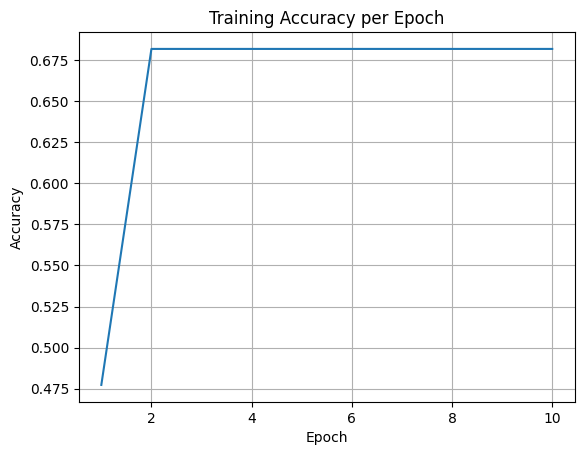

In [88]:
# Plotting the accuracy graph

plt.plot(range(1, num_epochs + 1), train_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy per Epoch")
plt.grid(True)
plt.show()

F1-score: 0.3333


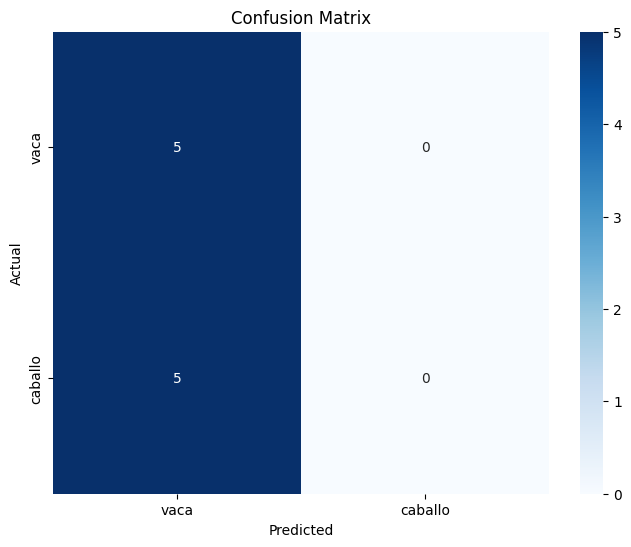

In [96]:
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

# ... (your existing code for model training and data loading) ...

# After training, evaluate on the test set
model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for data, targets, labels in test_loader:
        data = data.to(device)
        labels = labels.to(device)
        data = data.permute(0, 3, 1, 2)

        outputs = model(data)
        _, predicted = torch.max(outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate F1-score
f1 = f1_score(all_labels, all_predictions, average='weighted')  # Use 'weighted' for multi-class

print(f"F1-score: {f1:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)  # Replace 'classes' with your class names
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#**Conclusión**
El modelo tiene una capacidad de predicción muy pobre, esto se debe a que:
  - La data es insuficiente, AlexNet se creo para dataset muy grandes y para clasificar 1000 clases.
  - La calidad de la data es inferior, el modelo del paper usa imágenes de 227x227. Nosotros usamos 128x128 para el dataset por eso la capa final convulcional tiene que analizar dinamicamente el input
  - Mal split de train, validation y test set. El proceso se hizo a mano debido al etiquetado y problemas con el pasaje para el tpo grupal, quizás con otro split el modelo podría generalizar mejor.
  - Puede haber un problema con el ajuste de hiperparámetros, honestamente no probé con distintos valores, me guié por los del paper.
  - Data augmentation podría mejorar el análisis del modelo.